In [1]:
import dynamic_backtesting as db
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
assets = {"EEM": "Emerging Markets",
           "IVV": "S&P 500",
           "IEV": "MSCI Europe",
           "IXN": "Global Tech",
           "IYR": "US Real Estate",
           "IXG": "Global Financials",
           "EXI": "Global Industrials",
           "GC=F": "Gold Futures", 
           "BZ=F": "Brent Crude Oil Futures",
           "HYG": "High-Yield Corporate Bonds",
           "TLT": "20+ Year Treasury Bonds"}
tickers = list(assets.keys())
stocks = tickers[:7]
commodities = tickers[7:9]
bonds = tickers[9:]

In [3]:
v_t_s, out_of_sample_s, in_sample_s = db.garch_no_trading_cost(tickers, "2008-1-1", "2021-10-2", 0)

Calculating weights for: EEM IVV IEV IXN IYR IXG EXI GC=F BZ=F HYG TLT
[*********************100%***********************]  11 of 11 completed


In [24]:
v_t_s, out_of_sample_s, in_sample_s = db.garch_no_trading_cost(['IVV', 'TLT', 'IYR'], "2008-1-1", "2021-10-4", 250*5)

Calculating weights for: IVV TLT IYR
[*********************100%***********************]  3 of 3 completed


In [4]:
v_t_c, out_of_sample_c, in_sample_c = db.garch_no_trading_cost(commodities, "2008-1-1", "2021-10-4", 250*3)

Calculating weights for: GC=F BZ=F
[*********************100%***********************]  2 of 2 completed


In [5]:
v_t_b, out_of_sample_b, in_sample_b = db.garch_no_trading_cost(bonds, "2008-1-1", "2021-10-4", 250*3)

Calculating weights for: HYG TLT
[*********************100%***********************]  2 of 2 completed


In [25]:
res_s, perf_table_s = db.compare_strategies(v_t_s, out_of_sample_s)
res_c, perf_table_c = db.compare_strategies(v_t_c, out_of_sample_c)
res_b, perf_table_b = db.compare_strategies(v_t_b, out_of_sample_b)

In [27]:
perf_table_s

,Ann. standard deviation,Ann. return,Ann. Sharpe ratio
GARCH no trading costs,0.159831,0.154155,0.964486
Equal weight,0.122661,0.115083,0.938216


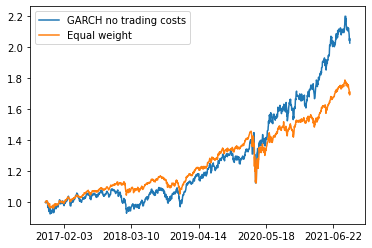

In [28]:
fig, ax = plt.subplots(1, 1)
ax.plot(res_s, label=perf_table_s.index)
ax.legend()
ax.xaxis.set_major_locator(plt.MaxNLocator(6))

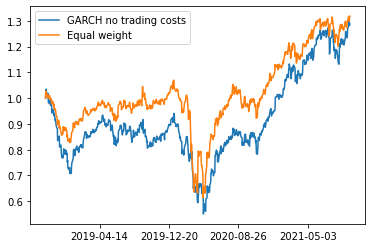

In [29]:
fig, ax = plt.subplots(1, 1)
ax.plot(res_c, label=perf_table_c.index)
ax.legend()
ax.xaxis.set_major_locator(plt.MaxNLocator(6))

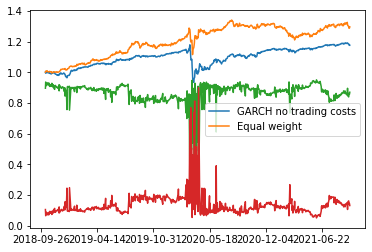

In [10]:
fig, ax = plt.subplots(1, 1)
ax.plot(res_b, label=perf_table_b.index)
ax.plot(v_t_b)
ax.legend()
ax.xaxis.set_major_locator(plt.MaxNLocator(6))